# **TRANSFORMAÇÃO E DIFERENCIAÇÃO**

In [1]:
# Import das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

**AairPassangers: Dados Classicos da companhia area Box e Jenkins. Totais mensais de passageiros de companhias aereas internacionais de 1949 a 1960**

In [2]:
# Import dos dados
dados = pd.read_csv("AirPassengers.csv")
dados.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# Criando a Serie
serie = pd.Series(dados['#Passengers'].values, index=dados['Month'])
serie

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

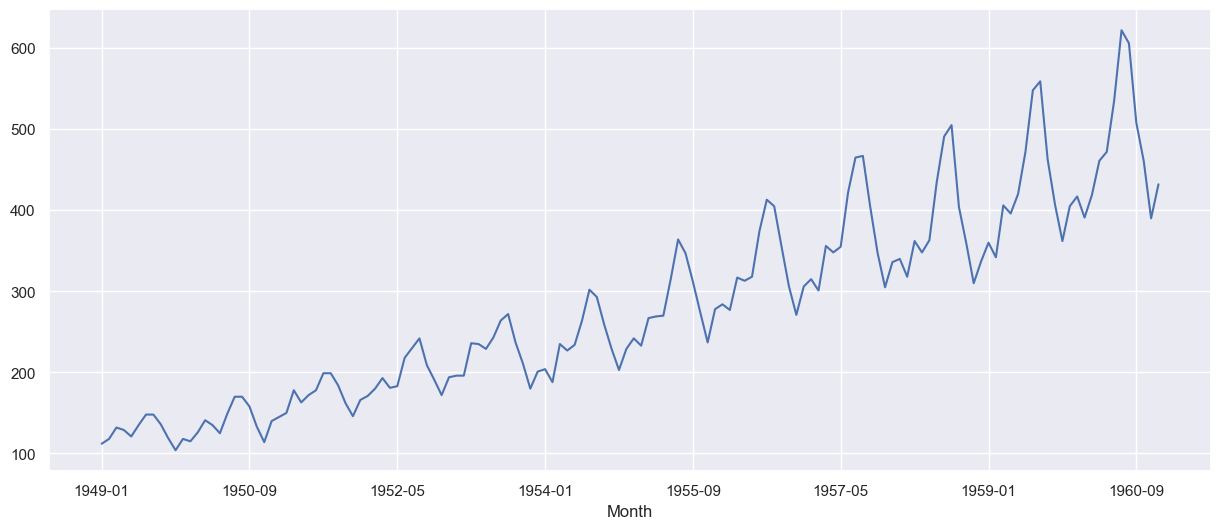

In [4]:
# Plot
serie.plot();

In [5]:
# Importando o scipy
import scipy.stats as stats

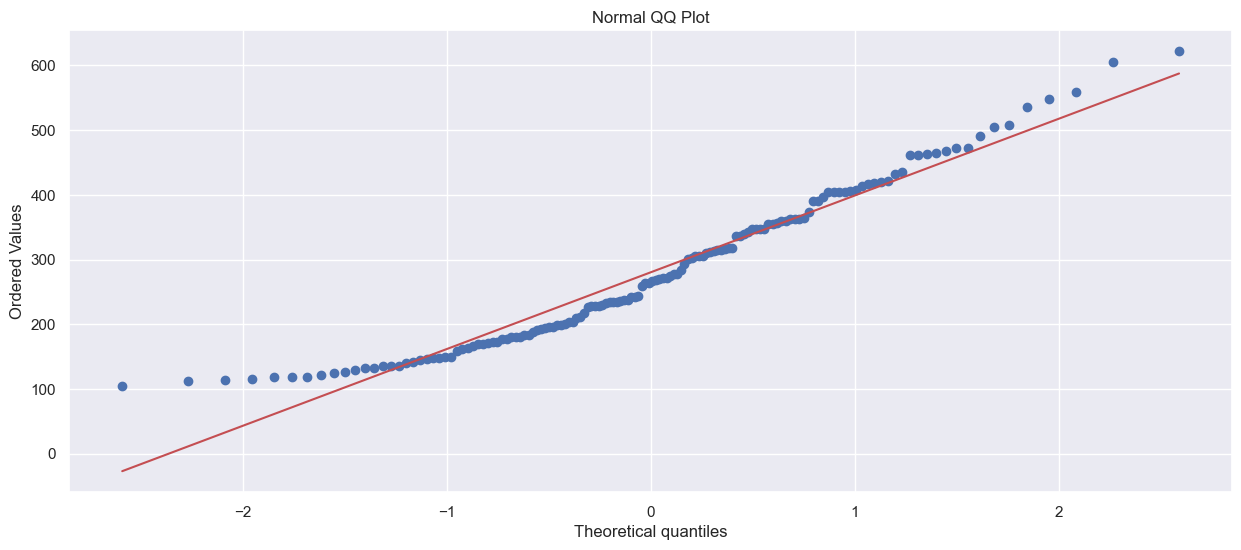

In [6]:
# Plot grafico QQ-Plot
stats.probplot(serie, dist='norm', plot=plt)
plt.title('Normal QQ Plot');

## Teste Shapiro-Wilk
    Criterios:
        Nivel de Significância de 0,05 ou 5% (Mais Utilizado)
        Quando p > 0,05 (Distribuição normal)

In [7]:
# Teste de shapiro
e, p = stats.shapiro(serie)
print(f'Estatistica de Teste: {e}')
print(f'P-valor: {p}')

Estatistica de Teste: 0.9519579410552979
P-valor: 6.832739018136635e-05


In [8]:
# Transformacao por log (Diminuir variancia e melhorar normalidade)
serie2 = np.log(serie)
serie2

Month
1949-01    4.718499
1949-02    4.770685
1949-03    4.882802
1949-04    4.859812
1949-05    4.795791
             ...   
1960-08    6.406880
1960-09    6.230481
1960-10    6.133398
1960-11    5.966147
1960-12    6.068426
Length: 144, dtype: float64

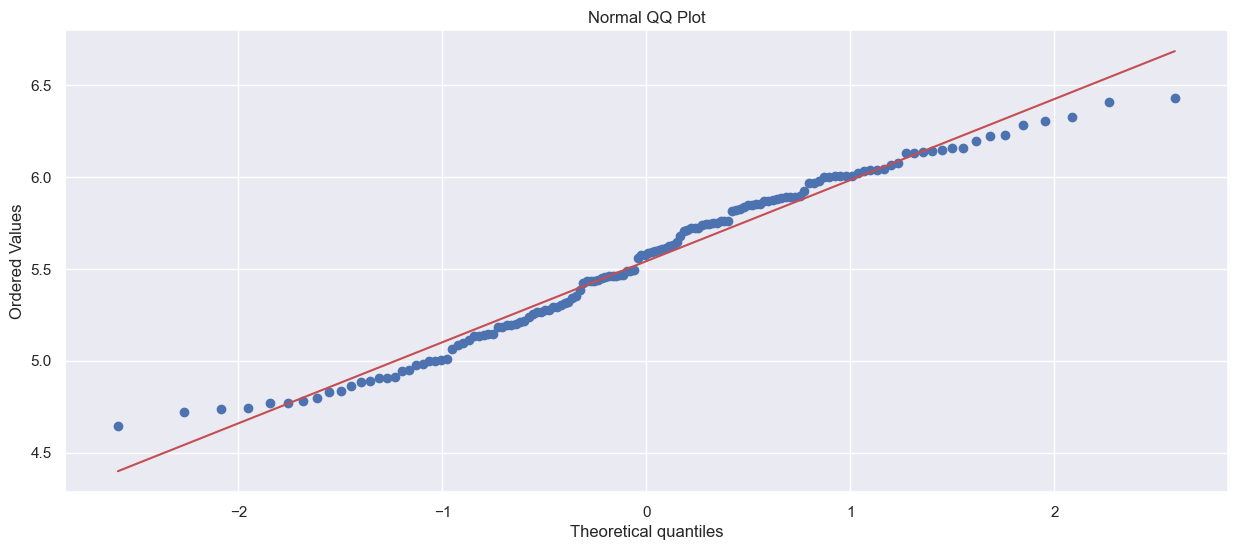

In [9]:
# 
stats.probplot(serie2, dist='norm', plot=plt)
plt.title('Normal QQ Plot');

## Teste Shapiro-Wilk
    Criterios:
        Nivel de Significância de 0,05 ou 5% (Mais Utilizado)
        Quando p > 0,05 (Distribuição normal)

In [10]:
e, p = stats.shapiro(serie2)
print(f'Estatistica do Teste: {e}')
print(f'P-valor: {p}')

Estatistica do Teste: 0.9732357859611511
P-valor: 0.00637402106076479


In [11]:
# Transformação por raiz cubica (quando possui dados com valor zero ou negativos)
serie3 = (serie) ** (1/3)
serie3

Month
1949-01    4.820285
1949-02    4.904868
1949-03    5.091643
1949-04    5.052774
1949-05    4.946087
             ...   
1960-08    8.462348
1960-09    7.979112
1960-10    7.725032
1960-11    7.306144
1960-12    7.559526
Length: 144, dtype: float64

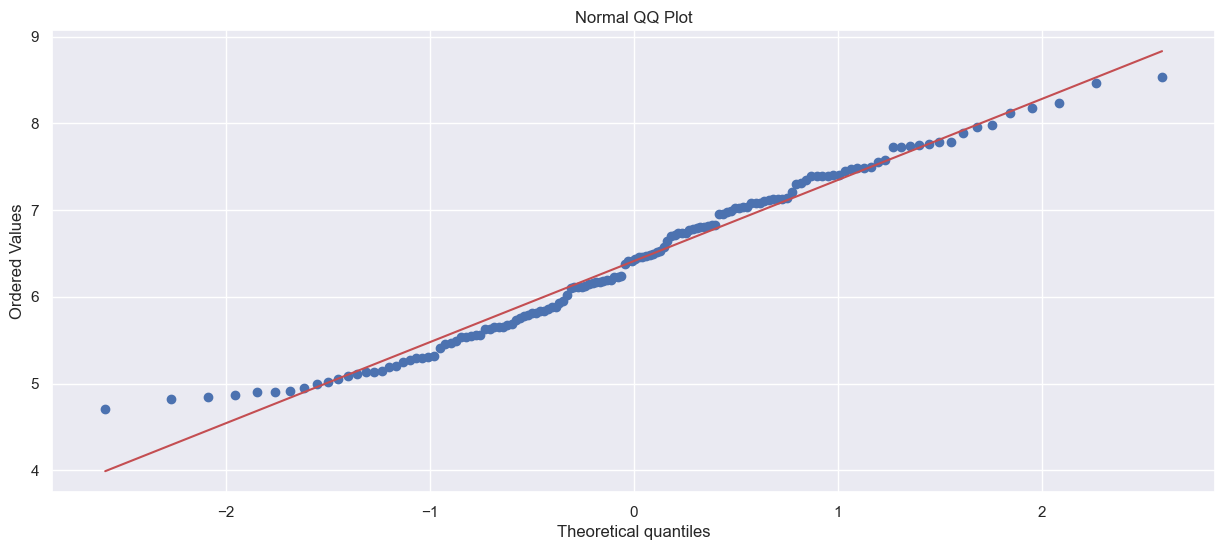

In [12]:
# PLot qqplot
stats.probplot(serie3, dist='norm', plot=plt)
plt.title('Normal QQ Plot');

## Teste Shapiro-Wilk
    Criterios:
        Nivel de Significância de 0,05 ou 5% (Mais Utilizado)
        Quando p > 0,05 (Distribuição normal)

In [13]:
e, p = stats.shapiro(serie3)
print(f'Estatistica do Teste: {e}')
print(f'P-valor: {p}')

Estatistica do Teste: 0.974599301815033
P-valor: 0.008835508488118649


C:\Users\franc\AppData\Local\Temp\ipykernel_12808\269262000.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie);


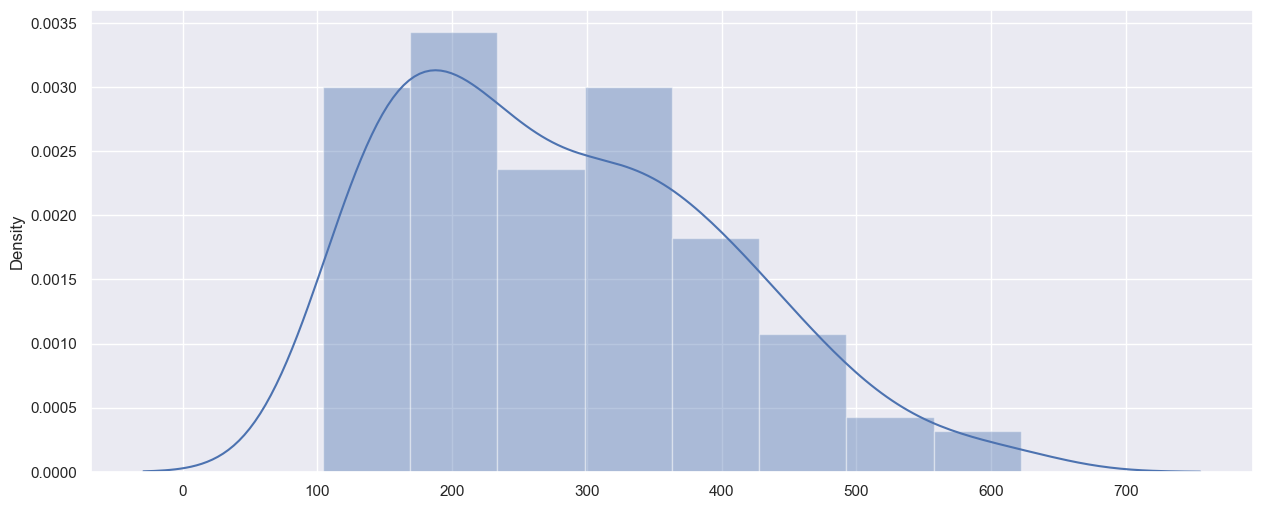

In [14]:
# Biblioteca Seaborn
import seaborn as sns
sns.distplot(serie);

C:\Users\franc\AppData\Local\Temp\ipykernel_12808\969798845.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie2, bins=15);


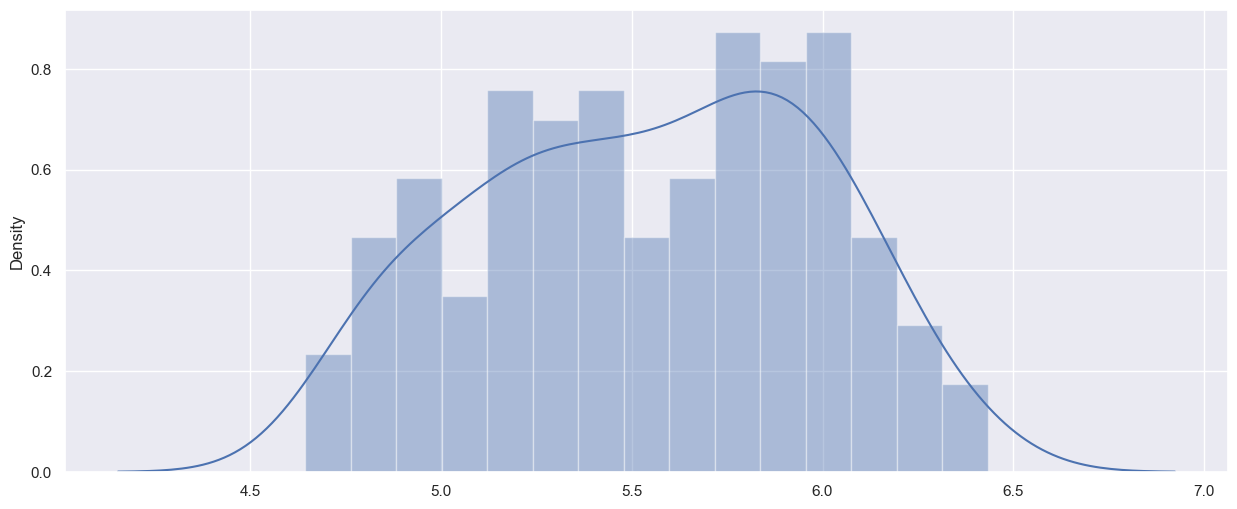

In [15]:
sns.distplot(serie2, bins=15);

C:\Users\franc\AppData\Local\Temp\ipykernel_12808\181411499.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie3, bins=15);


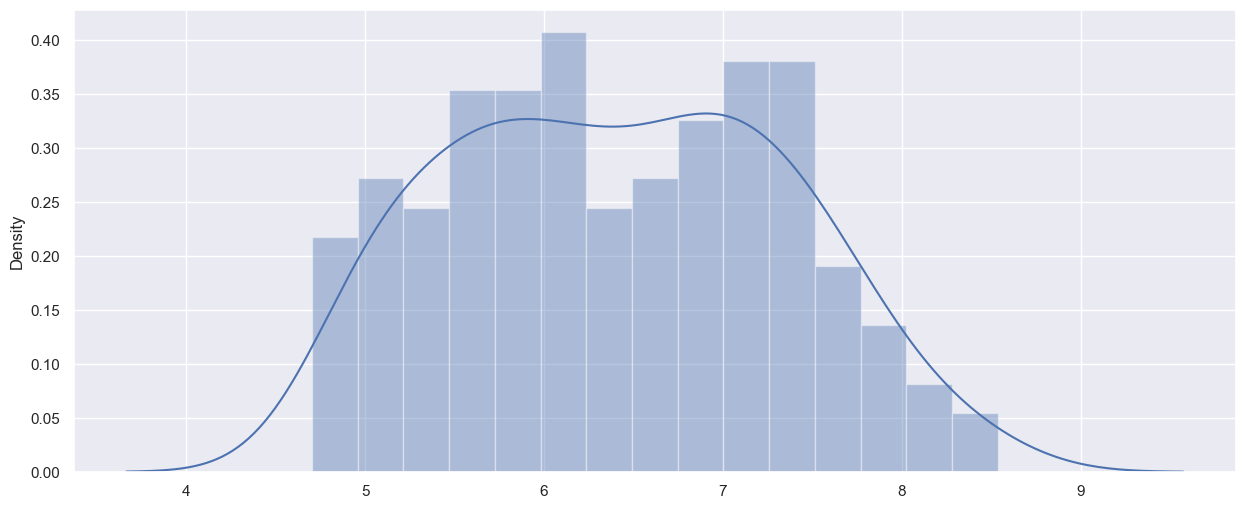

In [16]:
sns.distplot(serie3, bins=15);

## Diferenciacao

In [17]:
# Import
import statsmodels.tsa.stattools

**Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

    Ho = Não estacionario: Estatistica do Teste > valor critico
    Ha = É Estationario: Estatistica do teste < valor critico

In [18]:
kpss = statsmodels.tsa.stattools.kpss(serie3)
print(f'Estatistica de Teste: {kpss[0]}')
print(f'P-valor: {kpss[1]}')
print('Valor Critico: ')
for chave, valor in kpss[3].items():
    print(f'{chave}: {valor}')

Estatistica de Teste: 1.6734843825810306
P-valor: 0.01
Valor Critico: 
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


C:\Users\franc\anaconda3\envs\Data-Science\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


**Teste df (Dickey Fuller)**

    Ho = Não e Estacionario: Estatistica do teste > valor critico
    Ha = E Estacionario: Estatistica do Teste < valor critico

In [19]:
df = statsmodels.tsa.stattools.adfuller(serie3)
print(f'Estatistica do teste: {df[0]}')
print(f'P-valor: {df[1]}')
print('Valores criticos: ')
for chave, valor in df[4].items():
    print(f'{chave}: {valor}')

Estatistica do teste: -0.8100350722186453
P-valor: 0.8161565539700477
Valores criticos: 
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598


In [20]:
# Fazendo a Diferenciacao
serie4 = np.diff(serie3)
serie4[:20]

array([ 0.0845836 ,  0.18677524, -0.03886902, -0.1066869 ,  0.1838404 ,
        0.15964463,  0.        , -0.14700929, -0.22387845, -0.21601536,
        0.20219876, -0.041924  ,  0.1503538 ,  0.19152993, -0.07490002,
       -0.12992784,  0.30145919,  0.23819906,  0.        , -0.13353808])

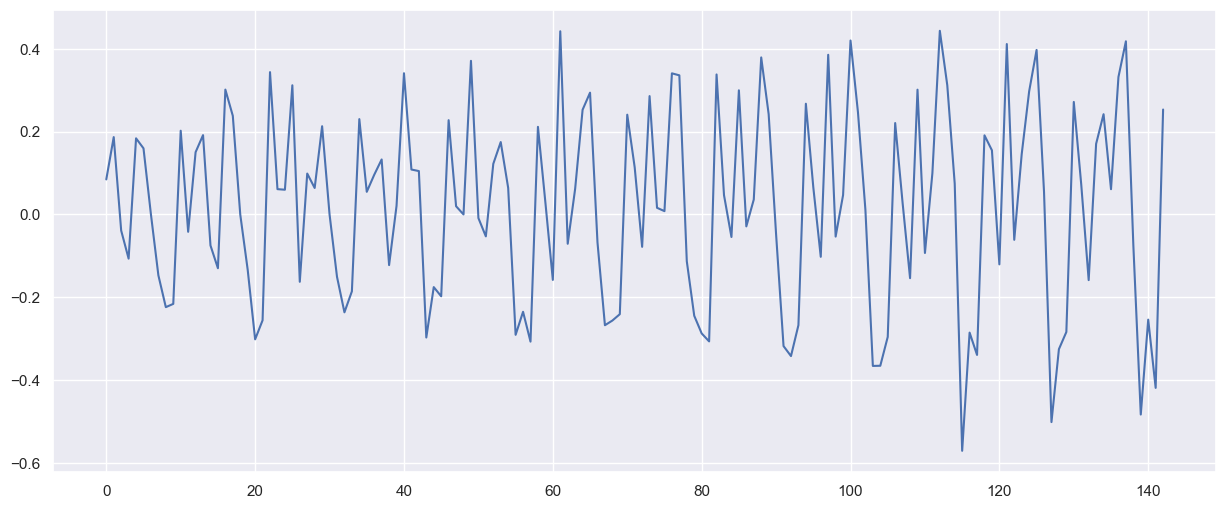

In [21]:
# Plot
plt.plot(serie4);

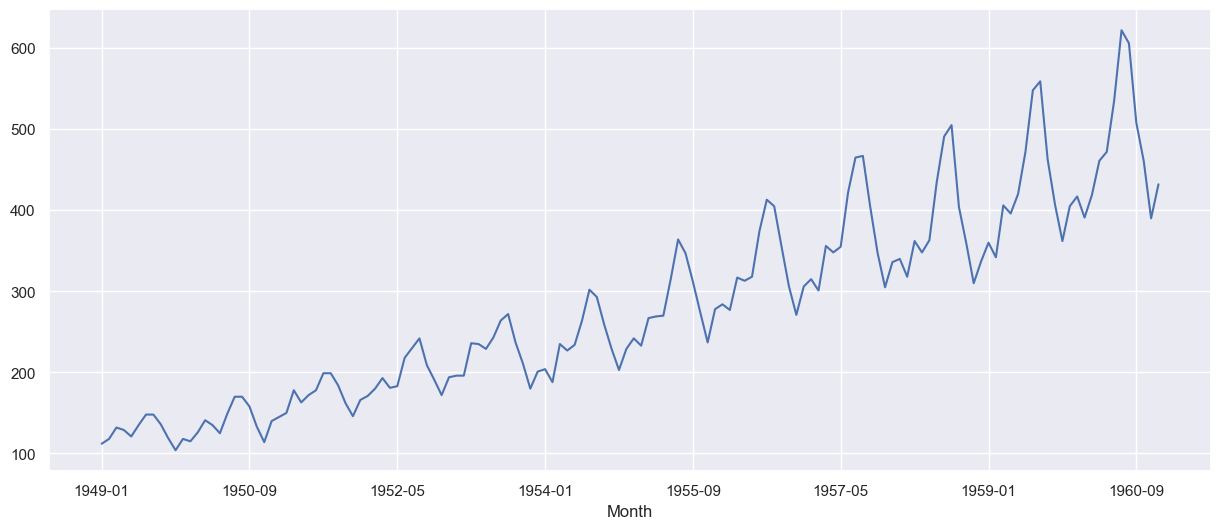

In [22]:
serie.plot();

In [23]:
# Calculo da Diferenciacao
# Subtracao da serie por um valor antecessor dela mesma
serie_diff = serie3 - serie3.shift()

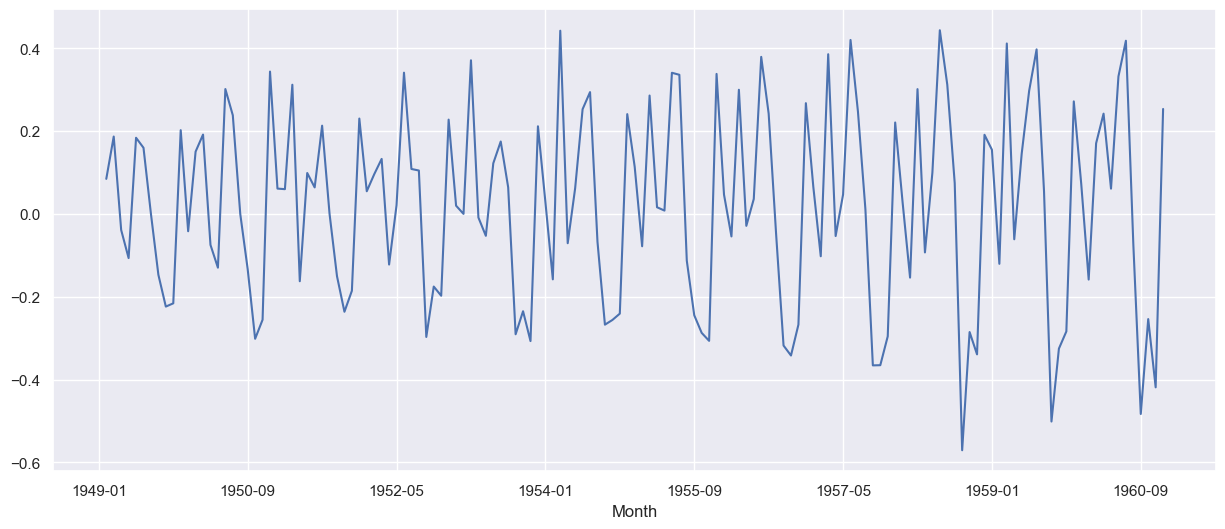

In [24]:
# Plot da serie
serie_diff.plot();

**Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

    Ho = Não estacionario: Estatistica do Teste > valor critico
    Ha = É Estationario: Estatistica do teste < valor critico

In [25]:
kpss = statsmodels.tsa.stattools.kpss(serie4)
print(f'Estatistica do teste: {kpss[0]}')
print(f'P-valor: {kpss[1]}')
print(f'Valores Criticos: ')
for chave, valor in kpss[3].items():
    print(f'{chave:<7}: {valor}')

Estatistica do teste: 0.02662625236199327
P-valor: 0.1
Valores Criticos: 
10%    : 0.347
5%     : 0.463
2.5%   : 0.574
1%     : 0.739


C:\Users\franc\anaconda3\envs\Data-Science\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [26]:
# Diferenciaco de segunda ordem
serie5 = np.diff(serie4)

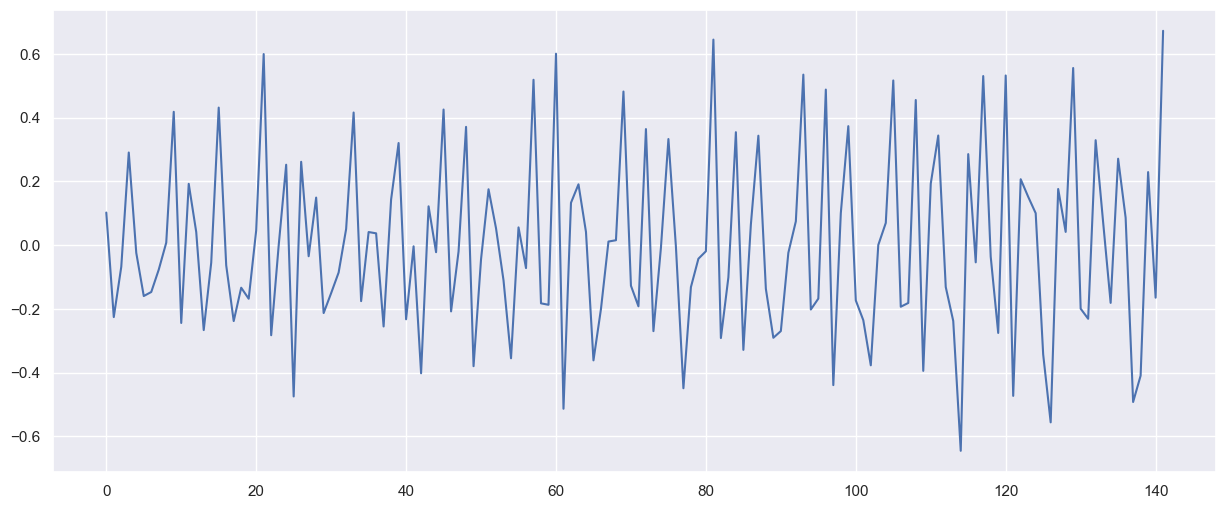

In [27]:
# Plot
plt.plot(serie5);

In [28]:
kpss5 = statsmodels.tsa.stattools.kpss(serie5)
print(f'Estatistica do teste: {kpss5[0]}')
print(f'P-valor: {kpss5[1]}')
print(f'Valores Criticos: ')
for chave, valor in kpss5[3].items():
    print(f'{chave:<7}: {valor}')

Estatistica do teste: 0.07618633282601833
P-valor: 0.1
Valores Criticos: 
10%    : 0.347
5%     : 0.463
2.5%   : 0.574
1%     : 0.739


C:\Users\franc\anaconda3\envs\Data-Science\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
